## An Introduction to Simple Linear Regression

In this session, we will introduce the Simple Linear Regression (SLR) Model.

Inferences for the simple linear regression model will be discussed. Emphasis will be placed on interpreting regression coefficients.

## Objectives

Upon successful completion of this session, you should be able to:
-   Fit a SLR model to data.
-   Use summary statistics from the fit to describe the relationship between a response variable and a predictor variable.
-   Interpret model coefficients.

### Model definition

The goal of a SLR model is to investigate the relationship between the response and the predictor variables. The focus in this session is **linear relationships**.

Recall -- from high school algebra -- that the equation of a line describing a linear relation between $x$ and $y$ has the following algebraic form:

$y = b + mx$

where $m$ is the slope and $b$ is the y-intercept.

The general form of the simple linear regression model -- for predicting a quantitative response (dependent) $Y$ on the basis of a single predictor (independent) variable $X$ -- closely resembles the equation of a line shown above, such that:

$Y = \beta_0 + \beta_1 X + \epsilon$

For an individual observation,
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$

Where:
-   $\beta_0$ is the is the population y-intercept,
-   $\beta_1$ is the population slope,
-   $x_i$ is the *i*th (predictor/independent) observation, and
-   $\epsilon_i$ is the error or deviation of observation $y_i$ from the line $\beta_0 + \beta_1 x_i$,
-   and $\epsilon \sim N (0, \sigma^2)$

Together, $\beta_0$ and $\beta_1$ are known as the (unknown) population model ***coefficients*** or ***parameters***.

We use training data (or random sample) to produce estimates of the parameters -- $\hat\beta_0$ and $\hat\beta_1$ to describe the relation between $Y$ and $X$, and make predictions of $\hat{y_i}$ given $x_i$.

#### Fitted Values and Residuals (Errors)

The predicted (fitted) value of $Y$ ($\hat{y_i}$) based on the *i*th value of $X$ ($\hat{x_i}$) is obtained by:

$fit_i=\hat{y_i} = \hat\beta_0 + \hat\beta_1 x_i$

Then

$res_i=\epsilon_i = y_i - \hat{y_i}$

represents the *i*th residual -- this is the difference between the *i*th observed response value and the *i*th response value that is predicted by our linear model.

Residual sum of squares (RSS) is a measure of distance between all responses and their fitted values:
$RSS=\sum_{i=1}^{n}res{_i}{^2}$

Least square estimates of $\beta_0$ and $\beta_1$ are values of intercept and slope that minimize RSS.

#### Model assumptions for simple linear regression

In an ideal SLR model, we obtain sub-populations of responses, one for each value of the explanatory/predictor variable.

The regression of the response variable $Y$ on the explanatory variable $X$ is a mathematical relationship between the **means** of these sub-populations and the explanatory variable.

The simple linear regression model specifies that this relationship is a straight line function of the explanatory variable.

The following model assumptions must hold to warrant fitting a SLR model to data:

1.  **Normality**: there is a normally distributed sub-population of responses for each value of the explanatory variable.

2.  **Linearity**: the means of the sub-populations fall on a straight line function of the explanatory variable.

3.  **Constant variance**: the sub-population standard deviations are all equal (to $\sigma$).

4.  **Independence**: the selection of an observation from any of the sub-populations is independent of the selection of any other observation. 

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd
import seaborn as sns

## Case Study 1: Is there a statistically significant relationship between height and weight?
Suppose we took a ***random*** sample from students at a large university and asked them about their **height** and **weight**. The data can be found [here](https://online.stat.psu.edu/stat500/sites/stat500/files/data/university_ht_wt.TXT). We want to determine and quantify the relationship between height and weight.

In [58]:
#Load data from file 
university_ht_wt = pd.read_csv("https://figshare.com/ndownloader/files/30850678")   # read in the data file
university_ht_wt.head() 

,height,weight
0,72.0,200.0
1,68.0,165.0
2,69.0,160.0
3,68.0,135.0
4,64.0,120.0


In [59]:
university_ht_wt.count()

height    30
weight    28
dtype: int64

In [60]:
#drop rows with empty values of weight
university_ht_wt['weight'].replace('', np.nan, inplace=True)
university_ht_wt.dropna(subset=['weight'], inplace=True)
university_ht_wt.count()

height    28
weight    28
dtype: int64

### Linearity

The relationship between $X$ and $Y$ must be linear. Check this assumption by examining a scatterplot of x and y.

<Axes: xlabel='height', ylabel='weight'>

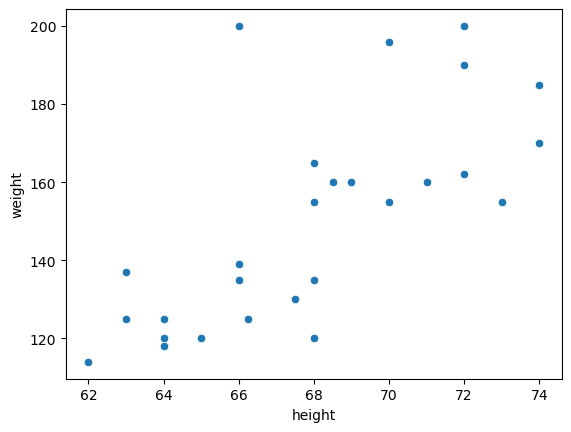

In [61]:
sns.scatterplot(data=university_ht_wt, x="height", y="weight")

### Independence of errors

We make sure there is no relationship between the residuals and the $Y$ variable; in other words, $Y$ is independent of errors. 

Check this assumption by examining a scatterplot of "residuals versus fits"; the correlation should be approximately 0.

### Equal variances

The variance of the residuals is the same for all values of $Y$. 

Check this assumption by examining the scatterplot of "residuals versus fits"; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

We first fit a SLR model, and obtain fitted values and residuals

In [72]:
#fit a SLR model 
fit = smf.ols('weight ~ height', data=university_ht_wt).fit()

#Obtain predcicted (fits) values; and residuals (errors)
university_ht_wt['predicted'] = fit.predict(university_ht_wt['height'])
university_ht_wt['residuals'] = fit.resid
university_ht_wt.head()

,height,weight,predicted,residuals
0,72.0,200.0,172.671250,27.328750
1,68.0,165.0,150.718434,14.281566
2,69.0,160.0,156.206638,3.793362
3,68.0,135.0,150.718434,-15.718434
4,64.0,120.0,128.765618,-8.765618


<Axes: xlabel='predicted', ylabel='residuals'>

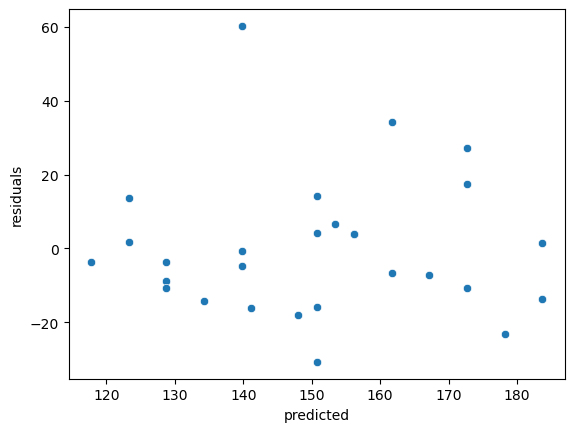

In [71]:
#Residuals vs fits plot 
sns.scatterplot(data=university_ht_wt, x="predicted", y="residuals")

### Normality of errors

The residuals must be approximately normally distributed. 

Check this assumption by examining a normal probability plot (Q-Q plot); the observations should be near the line.

Notice below that we first fit a SLR model to data.

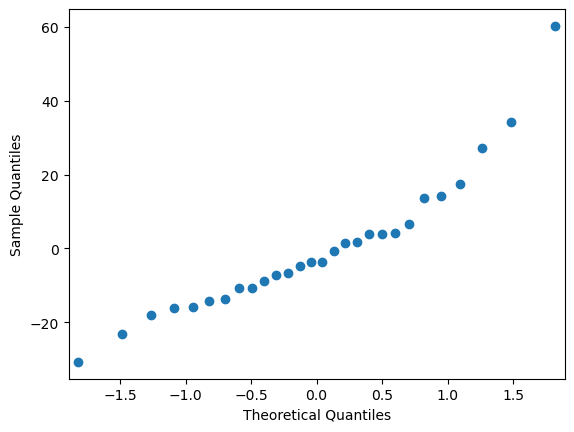

In [73]:
res = fit.resid
fig = sm.qqplot(res)
plt.show()

### Research Questions on the student height data

#### Is height a significant linear predictor of weight?

The regression model that describes the relationship between $weight$ and $height$ variables is:

$weight = \beta_0 + \beta_1 \cdot height + \epsilon$

The hypotheses we are testing are:

$H_0: \beta_1 = 0$

$H_A: \beta_1 \neq 0$

We compute a *t-statistic*, given by

$t = \frac{\hat{\beta_1} - 0} {SE(\hat{\beta_1)}}$

which measures the number of standard deviations that $\hat\beta_1$ is away from 0.

If there really is no relationship between $X$ and $Y$ , then we expect that the *t-statistic* will have a *t*-distribution with *n*−2 degrees of freedom.

The *t*-distribution has a bell shape and for values of *n* greater than approximately 30 and is quite similar to the standard normal distribution. Consequently, it is a simple matter to compute the probability of observing any number equal to *\|t\|* or larger in absolute value, assuming $\beta_1 = 0$. We call this probability the p-value. 

Roughly speaking, we interpret the p-value as follows: **a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response.**

We obtain the model summary from the previous fit of model to the (presumably random) sample from the population:

In [17]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     26.60
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           2.22e-05
Time:                        15:47:40   Log-Likelihood:                -121.30
No. Observations:                  28   AIC:                             246.6
Df Residuals:                      26   BIC:                             249.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -222.4794     72.421     -3.072      0.0

The regression equation for this fit becomes: 

**$weight = -222.48 + 5.49 *height$**

since the slope ($\beta_1$) is 5.49, the intercept ($\beta_0$) is -222.

The test for the slope has a p-value of less than 0.001. Therefore, with a significance level of 5% (and even as low as 0.1%), we can conclude that there is enough evidence to suggest that height is a significant linear predictor of weight.

Differently stated, **an increase of one inch in height is associated with -- on average -- an increase of 5.488 lbs in weight.**

Does $\beta_0$ have a meaningful interpretation?

The intercept is -222. Therefore, when height is equal to 0 (an unlikely scenario), then a person's weight is predicted to be -222 pounds. It is also not possible for someone to have a height of 0 inches or weight of -222 pounds. Therefore, the intercept does not have a valid meaning.

#### What's the (95%?) confidence interval for the population slope?

A 95% confidence interval is defined as a range of values such that with 95% interval probability, the range will contain the true unknown value of the parameter.

For linear regression, the 95% confidence interval for $\beta_1$ approximately takes the form

$\hat\beta_1 \pm t_\frac{\alpha}{2} SE(\hat\beta_1)$

That is, there is approximately a 95% chance that the interval will contain the true value of $\beta_1$.

In the case of the student height-weight data, the 95% confidence interval for $\beta_1$ (and $\beta_0$) can be obtained by: 

In [31]:
fit.conf_int()

,0,1
Intercept,-371.342490,-73.616396
height,3.300904,7.675504
